## Fitting to the pneumo data

Let's get the imports and data sorted first...

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import emcee as mc
import scipy.special as spec
from scipy.stats import norm, lognorm, expon, multinomial
import pandas as pd
import corner
import scipy.optimize as sco
from getdist import plots, MCSamples
import time

In [2]:
pneumodata = pd.read_excel('/Users/Rob/Box/Pneumo_DATA/carriage_episodes_AL.xlsx')

In [3]:
pneumodata

,start_date,end_date,t_i,t_f,length_dates,bday,age_d,length,serotype,lanes
0,2004-11-18,2005-01-27,373,443.0,70.0,2003-11-20,364,95,19F,6680_7#22
1,2005-02-19,2005-02-19,466,466.0,0.0,2003-11-20,457,24,33B,6736_6#13
2,2005-01-09,2005-03-17,425,492.0,67.0,2003-11-20,416,79,6B,6736_6#13
3,2004-01-20,2004-01-20,70,70.0,0.0,2003-11-20,61,30,24F,6259_7#9
4,2004-03-24,2004-09-21,134,315.0,181.0,2003-11-20,125,213,NT,6664_1#5;6630_2#13;6630_4#13;6631_5#20;6730_1#...
5,2004-02-03,2004-05-25,84,196.0,112.0,2003-10-23,103,147,14,6259_8#5;6593_5#15;6664_1#7;6631_1#12
6,2004-08-26,2004-08-26,289,289.0,0.0,2003-10-23,308,35,10B,6730_7#1
7,2004-06-08,2004-09-07,210,301.0,91.0,2003-11-05,216,120,14,6631_4#14;6649_7#12;6730_4#14
8,2004-03-05,2004-11-04,115,359.0,244.0,2003-11-05,121,259,19F,6641_6#19;6673_8#20;6630_3#3;6631_4#14;6649_7#...
9,2003-12-05,2004-01-06,24,56.0,32.0,2003-11-05,30,47,33C,6259_5#10;6259_6#13


In [4]:
pneumodata_removed_nonevents = pneumodata[pneumodata['length']>0.0]
serotype_labels = pneumodata_removed_nonevents['serotype'][pneumodata_removed_nonevents['serotype']!='NT'].unique()
bdays = pneumodata_removed_nonevents['bday'].unique()
print(serotype_labels)
print(str(len(serotype_labels)) + ' serotypes')
print(str(len(bdays)) + ' individuals')

['19F' '33B' '6B' '24F' 14 '10B' '33C' '10F' '6A/C' '23F' 34 '7F' '32A' 38
 '11A' '35C' '23A' 45 '15B/C' '15C' '18C' '19A' 8 '19B' '12F' '10A' '17F'
 '33D' 4 '15A' '9V' '28F' 13 31 '15B' '22F' '24A' 29 21 '23B' 5 '18F'
 '16F' '41F' 40 46 3 '35F' 20 1 '9A' '22A' '33F' 37 '7B' '9N' '25F' '32F'
 2 '9L' 36 '18A' '28A' 39 '18B' '12B' '35B' 48 42 '25A']
70 serotypes
294 individuals


In [5]:
state_labels = np.append('NT',serotype_labels)
number_codes = np.arange(0,len(serotype_labels)+1,1)
timescales_list = [np.asarray(pneumodata_removed_nonevents[pneumodata_removed_nonevents['bday']==b]['length']) \
                   for b in bdays]
state_list = [np.asarray([number_codes[(s==state_labels)][0] \
             for s in pneumodata_removed_nonevents[pneumodata_removed_nonevents['bday']==b]['serotype']]) \
             for b in bdays]

In [6]:
state_appearances = []
for nc in number_codes:
    count_total = 0
    for ind in state_list:
        count_total = count_total + np.count_nonzero(ind==nc)
    state_appearances.append(count_total)
state_appearances = np.asarray(state_appearances)
state_appearances

array([236, 405,  43, 320,  31, 259,  57,  28,  38, 332, 367, 153,  22,
         9,  59,  87, 136,  84,  14, 242,  38,  81, 146,  33,  47,  10,
        44,  33,  15,  56, 112,  64,  40,  96,  14,  56,  19,   2,  10,
        59,  53,  27,   4,  40,   3,  13,  23,  46,  42,  28,  18,   6,
        24,  19,   7,  21,  48,   2,   4,   1,  11,   1,  11,   3,   4,
         1,   1,   2,   5,   1,   2])

Look at empirical recovery time distribution shape...

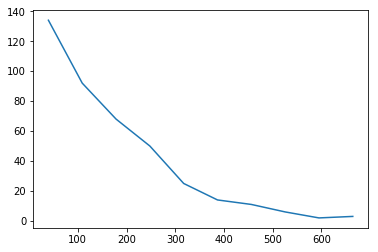

In [7]:
serotype_number_to_plot = 1
rec_dat = []
for tl,sl in zip(timescales_list,state_list):
    for t,s in zip(tl,sl):
        if s == serotype_number_to_plot: rec_dat.append(t)
v,b = np.histogram(rec_dat)
plt.plot(0.5*(b[1:]+b[:-1]),v)
plt.show()

### Model at equilibrium without immunity

So now `state_list` and `timescales_list` are lists with elements corresponding to an array of states and timescales in those states for each individual, respectively. The states are encoded numerically with the natural numbers from 1, where 0 corresponds to the 'susceptible' state. Let's do a quick multinomial inference of the assumed-equilibrium probabilities $p^{\rm eq}_i$ of entering each state can be mapped to the model without immunity by solving the following set of simultaneous equations

$$p^{\rm eq}_i = \frac{\Lambda_{i} + \sum_{\forall i'\neq i} (f_{i'i}-1)\Lambda_{i}p^{\rm eq}_{i'}}{\mu_i + \Lambda_{i} + \sum_{\forall i' \neq i}f_{ii'}\Lambda_{i'}}\,.$$

The $p^{\rm eq}_i$ values can be inferred from the data using the corresponding multinomial likelihood for data $d=\{ n_i,m\}$ consisting of the total number of times $n_i$ that the $i$-th serotype was occupied and the total number of times $m$ that the non-typeable (susceptible) state was occupied

$${\cal L}(\{ n_i,m\}\vert \{ p^{\rm eq}_i\}) = \frac{\Gamma \big( m+\sum_{\forall i}n_i - 1\big)}{\Gamma \big( m-1\big)\prod_{\forall i}\Gamma \big( n_i-1\big) } \big( 1-\sum_{\forall i}p^{\rm eq}_i\big)^m\prod_{\forall i}\big( p^{\rm eq}_i\big)^{n_i}\,.$$

Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


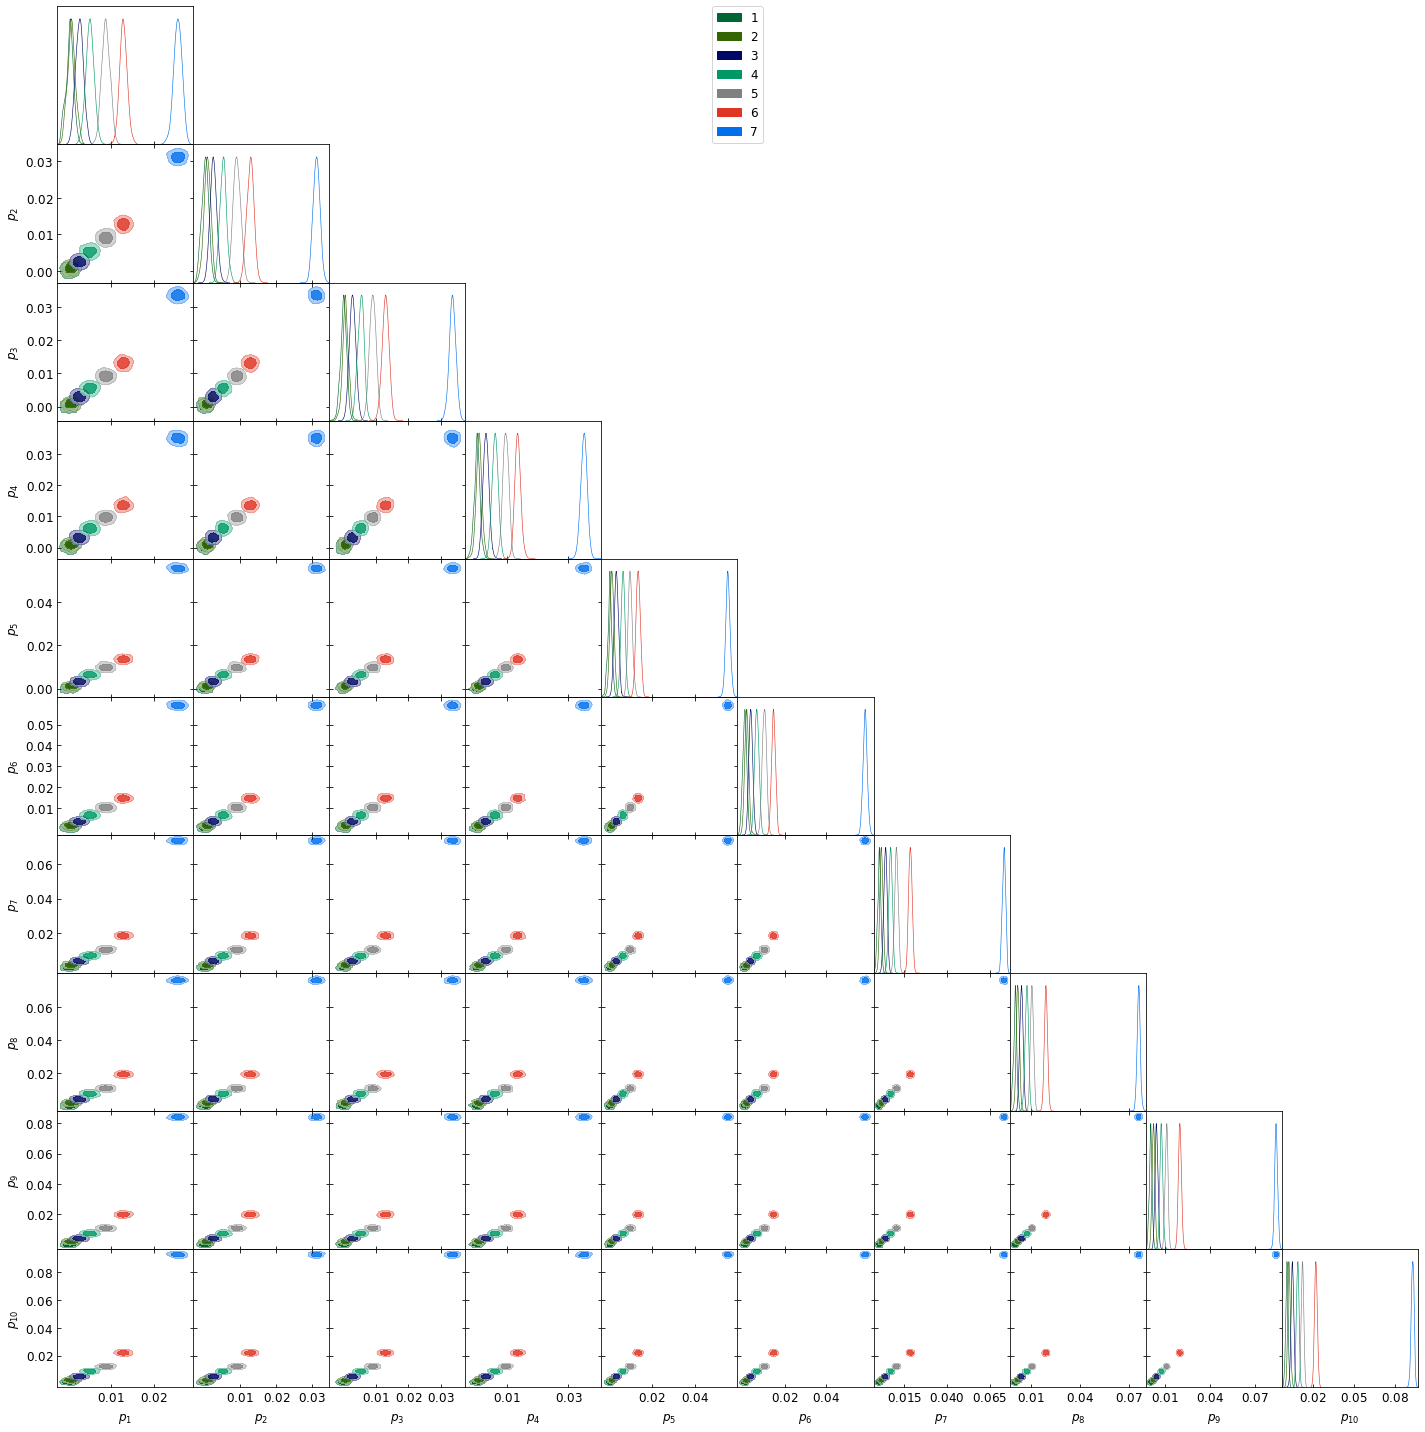

In [9]:
sus_state = state_appearances[0]
n_states = np.sort(state_appearances[1:])
tot_n_states = np.sum(state_appearances)
def loglike(params):
    peqs=params
    if any(p<=0.0 for p in peqs) or \
       any(p>=1.0 for p in peqs) or \
       np.sum(peqs)>=1.0:
        return -np.inf
    else:
        ps = np.append(1.0-np.sum(peqs),peqs)
        ns = np.append(sus_state,n_states)
        return multinomial(tot_n_states,ps).logpmf(ns)    
    
nwalkers = 500

init_ensemble = []
for ps in range(0,len(n_states)):
    init_ensemble.append(np.random.normal(n_states[ps]/tot_n_states,0.001,size=nwalkers))  
init_ensemble = np.asarray(init_ensemble).T

sampler = mc.EnsembleSampler(nwalkers, len(n_states), loglike)
sampler.run_mcmc(init_ensemble, 500)
samples = sampler.chain[:, 50:, :].reshape((-1, len(n_states)))
#samples = (samples.T[:,samples.T[0]<2000.0]).T
plot_labels = []
for ps in range(0,len(n_states)):
    plot_labels.append(r"$p^{\rm eq}_{" + str(ps) + "}$")
#corner.corner((samples.T[:6]).T, labels=plot_labels[:6])

#plot_labels = np.asarray(plot_labels)
#names_stack = [plot_labels[:7],plot_labels[7:14],plot_labels[14:21],\
#               plot_labels[21:28],plot_labels[28:35],plot_labels[35:42],\
#               plot_labels[42:49],plot_labels[49:56],plot_labels[56:63],plot_labels[63:70]]
labels =  ['1','2','3','4','5','6','7']
samples_list = [(samples.T[:10]).T,(samples.T[10:20]).T,(samples.T[20:30]).T,\
                 (samples.T[30:40]).T,(samples.T[40:50]).T,(samples.T[50:60]).T,(samples.T[60:70]).T]
samples_stack = []
for i in range(0,len(labels)):
    samples_stack.append(MCSamples(samples = samples_list[i], label = labels[i]))

# Triangle plot
g = plots.get_subplot_plotter()
g.settings.legend_fontsize=15
g.settings.axes_fontsize=15
g.settings.lab_fontsize=15
g.triangle_plot([samples_stack[0],samples_stack[1],samples_stack[2],samples_stack[3],samples_stack[4],\
                 samples_stack[5],samples_stack[6]], filled=True)

#plt.tight_layout()
plt.savefig('/Users/Rob/work/pneumofit/plots/equilibrium_probs.png',format='png',dpi=500)       
    
plt.show()

The first and second derivatives of the above log-likelihood can be written explicitly as

$$\frac{\partial}{\partial p^{\rm eq}_{i'}}\ln {\cal L}(\{ n_i,m\}\vert \{ p^{\rm eq}_i\}) =  -m\big( 1-\sum_{\forall i}p^{\rm eq}_i\big)^{-1} + n_{i'}\big( p^{\rm eq}_{i'}\big)^{-1}$$

$$\frac{\partial^2}{\partial p^{\rm eq}_{i''}\partial p^{\rm eq}_{i'}}\ln {\cal L}(\{ n_i,m\}\vert \{ p^{\rm eq}_i\}) =  -m\big( 1-\sum_{\forall i}p^{\rm eq}_i\big)^{-2} - n_{i'}\big( p^{\rm eq}_{i'}\big)^{-2}\delta_{i''i'}\,.$$